# Final Project
#### Anna Tigranyan


# Training a Model using Train dataset with labels

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
import json

import seaborn as sns
import re

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('train.jsonl', 'rb') as f:
   tr_df = f.readlines()

In [3]:
def get_TextAndLabel(data):
    """
    Getting text and  true label of the meme:
    0:not-hateful 1:hateful
    
    Args:
        data: List of bytes
    
    Returns:
        data frame contains text and categorys of meme
    
    """
    df = pd.DataFrame()
    
    categorys = []
    string = []
    
    for i in data:
        i = i.decode('ASCII')# decoding bytes to string
        i = json.loads(i)# converting string to dictionory in order to get label and text from the string
        label = i['label'] # getting the label
        text = i['text'] # getting the text
        
        categorys.append(label) # adding the label to our categoris list
        string.append(text) # adding the text to our texts list
        
    # as we have lists of the texts and categoris let's join them to our data frame df in order to have dataframe of the 
    # texts and labels
    
    df['text'] = string
    df['category'] = categorys
    
    return df 

Now we can get our data frame of the texts and categorys appling above function

In [4]:
df = get_TextAndLabel(tr_df)
df.head()

,text,category
0,its their character not their color that matters,0
1,don't be afraid to love again everyone is not ...,0
2,putting bows on your pet,0
3,i love everything and everybody! except for sq...,0
4,"everybody loves chocolate chip cookies, even h...",0


In [5]:
df['category'] = df['category'].astype('category') 

In [6]:
df.shape

(8500, 2)

In [7]:
#checking for null values
df.isna().sum()

text        0
category    0
dtype: int64

We don't have NA values so we can move on

#### Removing punctuations and special characters

In [8]:
df["text"] = df['text'].str.replace('[^\w\s]','')
df.head()

,text,category
0,its their character not their color that matters,0
1,dont be afraid to love again everyone is not l...,0
2,putting bows on your pet,0
3,i love everything and everybody except for squ...,0
4,everybody loves chocolate chip cookies even hi...,0


#### Lowercasing

In [9]:
df['text']=df['text'].str.lower()
df.head()

,text,category
0,its their character not their color that matters,0
1,dont be afraid to love again everyone is not l...,0
2,putting bows on your pet,0
3,i love everything and everybody except for squ...,0
4,everybody loves chocolate chip cookies even hi...,0


#### Removing Stopwords

In [10]:
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df.head()

,text,category
0,character color matters,0
1,dont afraid love everyone like ex,0
2,putting bows pet,0
3,love everything everybody except squirrels hat...,0
4,everybody loves chocolate chip cookies even hi...,0


#### Stemming

In [11]:
ps=PorterStemmer()

In [12]:
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string

In [13]:
#applying stemming
df['text'] = df['text'].apply(stem)

In [14]:
df.head()

,text,category
0,charact color matter,0
1,dont afraid love everyon like ex,0
2,put bow pet,0
3,love everyth everybodi except squirrel hate sq...,0
4,everybodi love chocol chip cooki even hitler,0


#### Vectorizing

In [15]:
#using CountVectorizer() approach to vectorize
coun_vect = CountVectorizer()

In [16]:
vector = coun_vect.fit_transform(df['text'])

In [17]:
vector=vector.toarray()

In [18]:
vector.shape

(8500, 6790)

#### Train Test Splitting

Now let's split our tran data(df) into train test in order to evalueate the performance of our future models

In [19]:
X_train=vector[0:7000]
Y_train=df['category'][0:7000]
X_test=vector[7000:]
Y_test=df['category'][7000:]

### Logistic Regression model

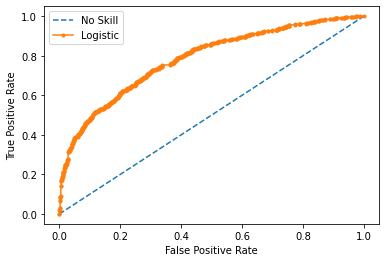

In [20]:

model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(X_train,Y_train)

# prediction
predictions_lr = model_lr.predict(X_test)

#retrieve just the probabilities for the positive class
pred_probs_lr = model_lr.predict_proba(X_test)[:,1]


# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y_test, pred_probs_lr)

# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
# show the plot
plt.show()


              precision    recall  f1-score   support

           0       0.72      0.88      0.79       879
           1       0.76      0.51      0.61       621

    accuracy                           0.73      1500
   macro avg       0.74      0.70      0.70      1500
weighted avg       0.73      0.73      0.72      1500



<AxesSubplot:>

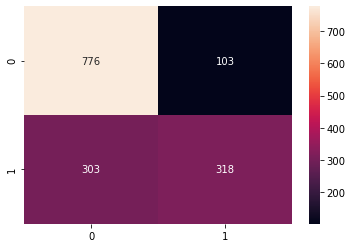

In [21]:
print(classification_report(Y_test,predictions_lr))
cm = confusion_matrix(Y_test,predictions_lr)

sns.heatmap(cm,annot=True,fmt='d')

Our model is Logistic Regression model.<br>
From above we can see that we have **precision**:
- 72% for 0s
- 76% for 1s


In the next notebook we are going tu use logistic regression model for sentiment analyses in the test dataset.